<a href="https://colab.research.google.com/github/giuliovv/tfest/blob/main/examples/tfest_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install tfest

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir("..")
import tfest

from scipy import signal

In [3]:
s1 = signal.lti([1], [1, 1])

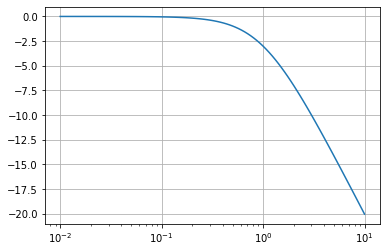

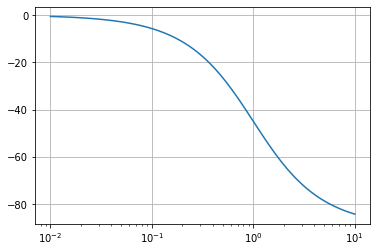

In [4]:
w, mag, phase = s1.bode()
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid()
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid()
plt.show()

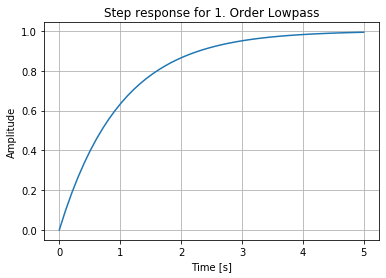

In [5]:
time = 5
t = np.linspace(0, time, num=50)
u = np.ones_like(t)
tout, y, x = signal.lsim(s1, u, t)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

In [6]:
te = tfest.tfest(u, y)

In [11]:
te.estimate(nzeros=0, npoles=1, method="h1", time=time, options={'xatol': 1e-4, 'disp': True})

Optimization terminated successfully.
         Current function value: 177248770057.832336
         Iterations: 63
         Function evaluations: 121


 final_simplex: (array([[1.59645729, 0.59621439, 0.89272575],
       [1.59644763, 0.59621012, 0.89270816],
       [1.59639469, 0.59619117, 0.8926913 ],
       [1.59641896, 0.59619474, 0.89269228]]), array([1.7724877e+11, 1.7724877e+11, 1.7724877e+11, 1.7724877e+11]))
           fun: 177248770057.83234
       message: 'Optimization terminated successfully.'
          nfev: 121
           nit: 63
        status: 0
       success: True
             x: array([1.59645729, 0.59621439, 0.89272575])

In [12]:
te.get_transfer_function()

TransferFunctionContinuous(
array([2.67765644]),
array([1.        , 1.49732339]),
dt: None
)

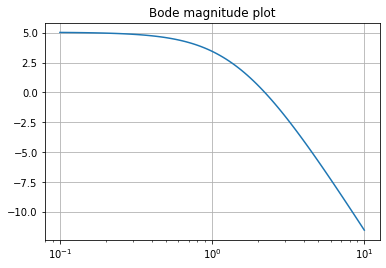

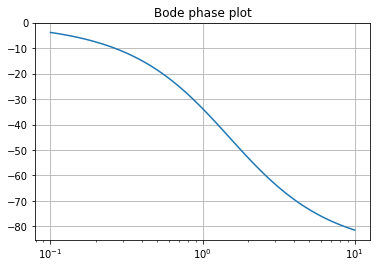

In [13]:
te.plot_bode()

/home/giulio/prog/.virtualenv/ML/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


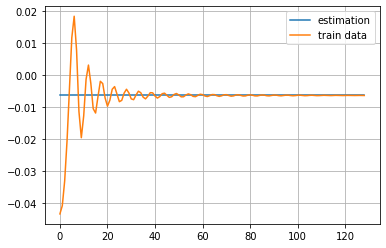

In [10]:
te.plot()